In [3]:
import pandas as pd
import numpy as np

In [4]:
cmg_real = pd.read_csv('costo_marginal_real.csv')
cmg_real = cmg_real.sample(100000)
cmg_real

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
889343,BA01R020SE005R020,BA02T002SE032T002,2019-01-14,5,57.34,38.85244,BA S/E EL TOTORAL 12KV
2301037,BA02T005SE188T005,BA02T002SE032T002,2019-06-19,13,71.20,49.80582,BA S/E QUIRIHUE 33KV
3296114,BA01T030SE001T022,BA02T002SE032T002,2019-03-28,19,46.89,31.83925,BA S/E NUEVA CARDONES 500KV BA1
3450082,BA01R003SE050R003,BA02T002SE032T002,2019-03-03,20,54.28,35.37916,BA S/E PANQUEHUE BARRA 44KV
3415872,BA03T005SE130T005,BA02T002SE032T002,2019-01-27,20,53.63,36.04687,BA S/E PARRAL 66KV
...,...,...,...,...,...,...,...
1412915,BA03T005SE200T005,BA02T002SE032T002,2019-06-29,8,37.47,25.47435,BA S/E QUELENTARO 220KV
175940,BA40T005SE283T005,BA02T002SE032T002,2019-01-19,1,109.54,73.54187,BA S/E PALAFITOS 110KV
571073,BA03G014SE002G014,BA02T002SE032T002,2019-02-24,4,40.78,26.68358,BA S/E CENTRAL PEUCHEN 220KV
1491379,BA37G216SE160G216,BA02T002SE032T002,2019-03-19,9,46.54,31.15341,BA S/E TAP OFF EL NEGRO 110KV


In [5]:
cmg_prog = pd.read_csv('costo_marginal_programado.csv')
cmg_prog = cmg_prog.sample(100000)
cmg_prog

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
468276,BA01R003SE001R003,BA S/E AGUA SANTA BARRA 220KV N° 1,2019-03-25,13,95.772831
160609,BA51G226SE091G226,BA S/E KELAR 220KV - BP1,2019-01-29,2,79.804836
1038050,-,-,2019-02-19,8,54.510819
1135978,-,-,2019-05-25,21,98.421816
7635,BA31L120SE065L120,BA S/E DOMEYKO 220KV - BP1,2019-01-02,4,58.369967
...,...,...,...,...,...
443345,BA93G235SE106G216,BA S/E MEJILLONES 110KV,2019-03-20,18,48.620978
1191969,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-03,14,39.354871
699395,BA01T002SE044T002,BA TAP TILCOCO 154KV,2019-05-04,17,58.550891
70978,BA03T002SE026T002,BA S/E MAITENCILLO 220KV SECCIÓN 1 EN AIRE,2019-01-13,11,46.083493


In [6]:
cmg_prog = cmg_prog.rename(columns={'mnemotecnico_barra':'barra_mnemotecnico'})

In [7]:
costo_marginal = cmg_real.merge(cmg_prog, how='inner', on='barra_mnemotecnico')
costo_marginal.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha_x,hora_x,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,fecha_y,hora_y,costo
0,BA01G271SE002G271,BA02T002SE032T002,2019-05-14,6,58.88,40.37225,BA S/E DOÑA CARMEN 220KV,BA S/E DOÑA CARMEN 220KV,2019-04-17,23,75.002003
1,BA01G271SE002G271,BA02T002SE032T002,2019-05-14,6,58.88,40.37225,BA S/E DOÑA CARMEN 220KV,BA S/E DOÑA CARMEN 220KV,2019-02-14,2,51.442711
2,BA01G271SE002G271,BA02T002SE032T002,2019-05-14,6,58.88,40.37225,BA S/E DOÑA CARMEN 220KV,BA S/E DOÑA CARMEN 220KV,2019-02-22,24,51.052790
3,BA01G271SE002G271,BA02T002SE032T002,2019-05-14,6,58.88,40.37225,BA S/E DOÑA CARMEN 220KV,BA S/E DOÑA CARMEN 220KV,2019-03-26,10,94.204995
4,BA01G271SE002G271,BA02T002SE032T002,2019-05-14,6,58.88,40.37225,BA S/E DOÑA CARMEN 220KV,BA S/E DOÑA CARMEN 220KV,2019-04-07,10,48.589213


# Analisis Exploratorio 

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
costo_marginal.describe()

,hora_x,costo_en_dolares,costo_en_pesos,hora_y,costo
count,7711972.00,7711972.00,7711972.00,7711972.00,7711972.00
mean,12.59,58.60,39.56,12.51,61.79
std,6.91,23.24,15.52,6.93,23.72
min,1.00,0.00,0.00,1.00,-10.86
25%,7.00,48.55,32.64,7.00,49.91
50%,13.00,53.40,36.07,12.00,55.02
75%,19.00,60.71,41.17,19.00,64.19
max,25.00,469.07,310.34,25.00,610.60


In [9]:
costo_marginal.dtypes

barra_mnemotecnico                object
barra_referencia_mnemotecnico     object
fecha_x                           object
hora_x                             int64
costo_en_dolares                 float64
costo_en_pesos                   float64
nombre                            object
nombre_barra                      object
fecha_y                           object
hora_y                             int64
costo                            float64
dtype: object

In [10]:
costo_marginal.shape

(7711972, 11)

In [11]:
duplicados = costo_marginal[costo_marginal.duplicated()]
print("Numero de filas duplicadas: ", duplicados.shape)

Numero de filas duplicadas:  (0, 11)


In [12]:
costo_marginal.count()

barra_mnemotecnico               7711972
barra_referencia_mnemotecnico    7711972
fecha_x                          7711972
hora_x                           7711972
costo_en_dolares                 7711972
costo_en_pesos                   7711972
nombre                           7711972
nombre_barra                     7711972
fecha_y                          7711972
hora_y                           7711972
costo                            7711972
dtype: int64

In [13]:
print(costo_marginal.isnull().sum())

barra_mnemotecnico               0
barra_referencia_mnemotecnico    0
fecha_x                          0
hora_x                           0
costo_en_dolares                 0
costo_en_pesos                   0
nombre                           0
nombre_barra                     0
fecha_y                          0
hora_y                           0
costo                            0
dtype: int64


# # Verificamos si existen Outliers

<AxesSubplot:xlabel='costo'>

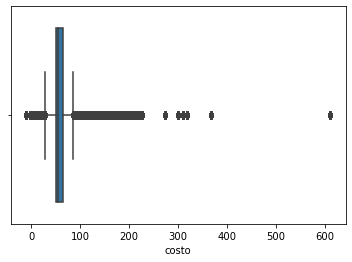

In [14]:
import seaborn as sns
sns.boxplot(x=costo_marginal['costo'])

<AxesSubplot:xlabel='costo_en_pesos'>

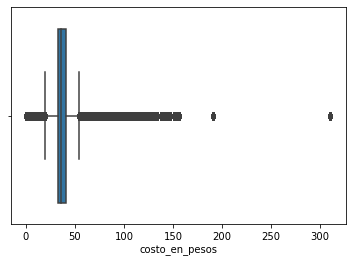

In [15]:
sns.boxplot(x=costo_marginal['costo_en_pesos'])

<AxesSubplot:xlabel='costo_en_dolares'>

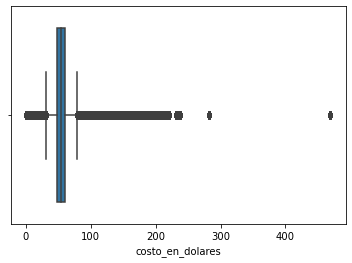

In [16]:
sns.boxplot(x=costo_marginal['costo_en_dolares'])

In [17]:
Q1 = costo_marginal.quantile(0.25)
Q3 = costo_marginal.quantile(0.75)
RIC = Q3 - Q1
print(RIC)

hora_x             12.00
costo_en_dolares   12.16
costo_en_pesos      8.53
hora_y             12.00
costo              14.28
dtype: float64


In [18]:
costo_marginal = costo_marginal[~((costo_marginal < (Q1 - 1.5 * RIC)) |(costo_marginal > (Q3 + 1.5 * RIC))).any(axis=1)]
costo_marginal.shape

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_13988/3095524896.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  costo_marginal = costo_marginal[~((costo_marginal < (Q1 - 1.5 * RIC)) |(costo_marginal > (Q3 + 1.5 * RIC))).any(axis=1)]


(6023343, 11)

# # Graficos

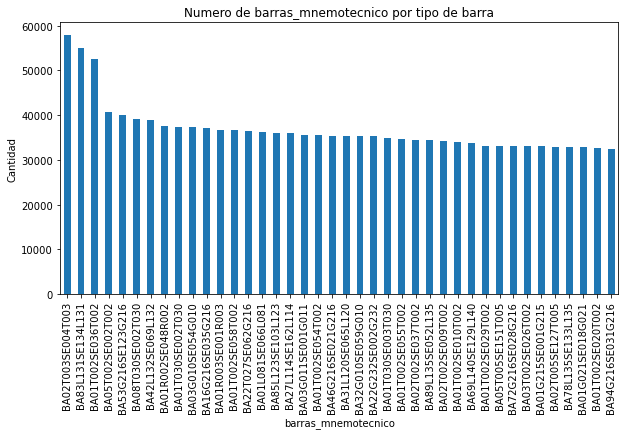

In [19]:
import matplotlib.pyplot as plt
costo_marginal.barra_mnemotecnico.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Numero de barras_mnemotecnico por tipo de barra')
plt.ylabel('Cantidad')
plt.xlabel('barras_mnemotecnico');

array([[<AxesSubplot:title={'center':'hora_x'}>,
        <AxesSubplot:title={'center':'costo_en_dolares'}>],
       [<AxesSubplot:title={'center':'costo_en_pesos'}>,
        <AxesSubplot:title={'center':'hora_y'}>],
       [<AxesSubplot:title={'center':'costo'}>, <AxesSubplot:>]],
      dtype=object)

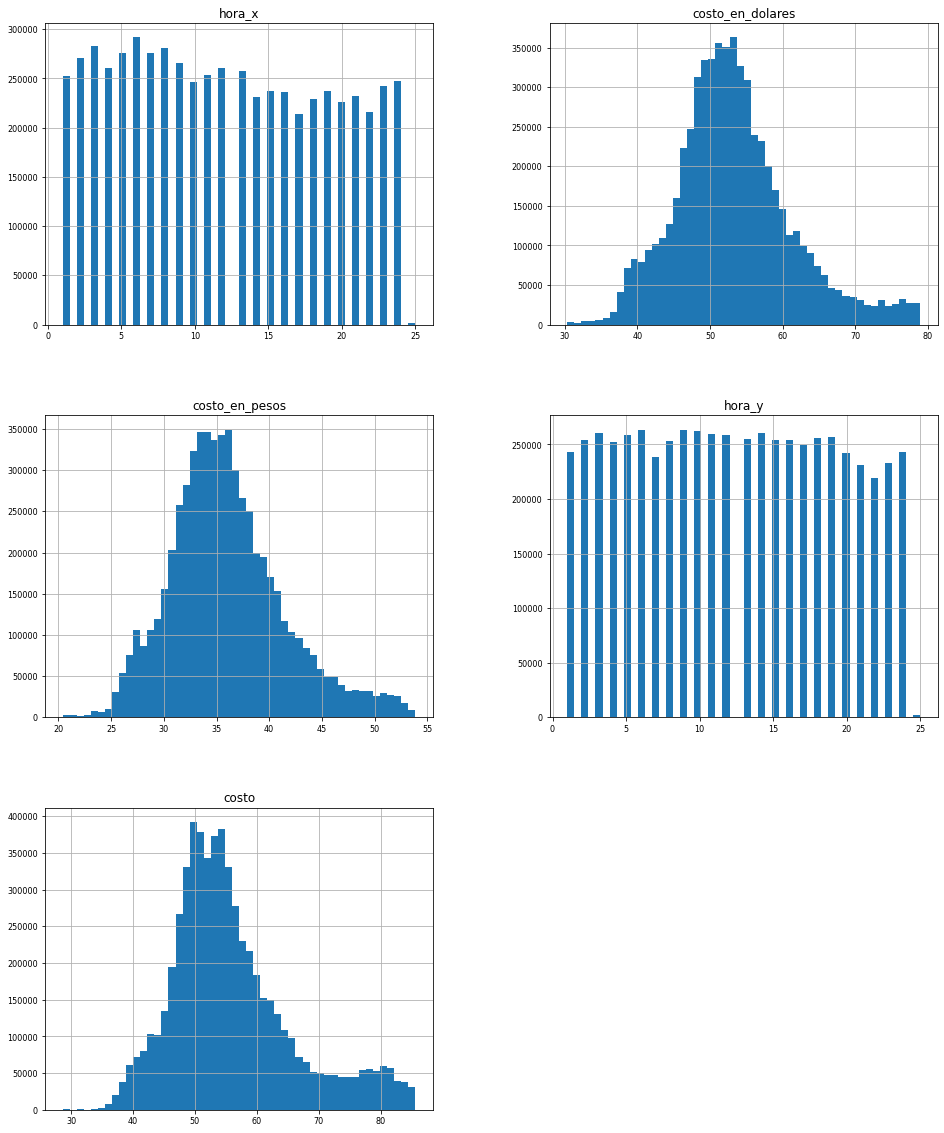

In [20]:
costo_marginal.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [21]:
## En los histogramas podemos observar que los costos programados y los costos reales presentan distribuciones similares
## Dicha distribución se puede aproximar a una distribución "Normal"

In [22]:
costo_marginal_corr = costo_marginal.corr()['costo_en_dolares']
golden_features_list = costo_marginal_corr[abs(costo_marginal_corr) > 0.5].sort_values(ascending=False)
print("Existen {} valores correlacionados con el costo real en dolares:\n{}".format(len(golden_features_list), golden_features_list))

Existen 2 valores correlacionados con el costo real en dolares:
costo_en_dolares   1.00
costo_en_pesos     0.99
Name: costo_en_dolares, dtype: float64


In [23]:
columnas_real = pd.read_csv('costo_marginal_real.csv')
columnas_real = len(columnas_real.index)
columnas_programado = pd.read_csv('costo_marginal_programado.csv')
columnas_programado = len(columnas_programado.index)
proporcion = columnas_real/columnas_programado
print('La cantidad de barras para la que fue programado el costo es: ' + str(columnas_programado))
print('La cantidad de barras que podemos observar en la base es: ' + str(columnas_real))
print('El porcentaje total de barras que se observa en las bases es: ' + str(proporcion))

La cantidad de barras para la que fue programado el costo es: 1192124
La cantidad de barras que podemos observar en la base es: 4309951
El porcentaje total de barras que se observa en las bases es: 3.6153546107619676


# 2.Construccion de variables

In [24]:
def f(row):
    if row['desviacion_ptc'] < -15 or row['desviacion_ptc'] > 15:
        val = 1
    else:
        val = 0
    return val

In [25]:
costo_marginal['desviacion'] = costo_marginal['costo_en_dolares']-costo_marginal['costo']
costo_marginal['desviacion_ptc'] = (costo_marginal['costo_en_dolares']-costo_marginal['costo'])/costo_marginal['costo_en_dolares']*100
costo_marginal['desviacion_cat'] = costo_marginal.apply(f, axis=1)

In [26]:
costo_marginal.sort_values('fecha_x')

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha_x,hora_x,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,fecha_y,hora_y,costo,desviacion,desviacion_ptc,desviacion_cat
7201987,BA85L123SE103L123,BA02T002SE032T002,2019-01-01,19,53.05,36.91,BA S/E MANTOS BLANCOS 220KV,BA S/E MANTOS BLANCOS 220KV,2019-04-22,6,53.68,-0.63,-1.19,0
1396190,BA01T002SE020T002,BA02T002SE032T002,2019-01-01,16,44.75,31.13,BA S/E ITAHUE 154KV SECCION 1,BA S/E ITAHUE 154KV SECCION 1,2019-06-06,1,48.89,-4.14,-9.26,0
1396189,BA01T002SE020T002,BA02T002SE032T002,2019-01-01,16,44.75,31.13,BA S/E ITAHUE 154KV SECCION 1,BA S/E ITAHUE 154KV SECCION 1,2019-05-21,2,56.16,-11.41,-25.50,1
1396188,BA01T002SE020T002,BA02T002SE032T002,2019-01-01,16,44.75,31.13,BA S/E ITAHUE 154KV SECCION 1,BA S/E ITAHUE 154KV SECCION 1,2019-03-02,15,48.73,-3.98,-8.90,0
1396187,BA01T002SE020T002,BA02T002SE032T002,2019-01-01,16,44.75,31.13,BA S/E ITAHUE 154KV SECCION 1,BA S/E ITAHUE 154KV SECCION 1,2019-03-11,8,52.54,-7.79,-17.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627244,BA01G021SE018G021,BA02T002SE032T002,2019-06-30,7,36.88,25.07,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,2019-01-16,12,54.42,-17.54,-47.55,1
1627245,BA01G021SE018G021,BA02T002SE032T002,2019-06-30,7,36.88,25.07,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,2019-03-30,19,53.66,-16.78,-45.50,1
1627246,BA01G021SE018G021,BA02T002SE032T002,2019-06-30,7,36.88,25.07,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,2019-04-21,13,74.23,-37.35,-101.28,1
1627237,BA01G021SE018G021,BA02T002SE032T002,2019-06-30,7,36.88,25.07,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,2019-04-13,20,54.88,-18.00,-48.81,1


In [27]:
costo_marginal['desviacion_cat'].describe()

count   6023343.00
mean          0.46
std           0.50
min           0.00
25%           0.00
50%           0.00
75%           1.00
max           1.00
Name: desviacion_cat, dtype: float64

In [28]:
df = costo_marginal
df = df.rename(columns={'fecha_x':'fecha'})
df['fecha'] = df['fecha'].astype("datetime64")
df = df.sort_values('fecha')
df = df.groupby('fecha').mean()
df.head()

,hora_x,costo_en_dolares,costo_en_pesos,hora_y,costo,desviacion,desviacion_ptc,desviacion_cat
fecha,,,,,,,,
2019-01-01,12.81,48.75,33.92,12.37,55.75,-7.00,-16.49,0.55
2019-01-02,12.97,49.97,34.76,12.32,56.19,-6.23,-12.95,0.40
2019-01-03,12.19,49.61,34.46,12.27,56.15,-6.54,-13.63,0.43
2019-01-04,11.68,52.86,36.85,12.30,56.07,-3.20,-7.63,0.42
2019-01-05,13.02,51.16,35.69,12.28,56.10,-4.95,-10.28,0.42


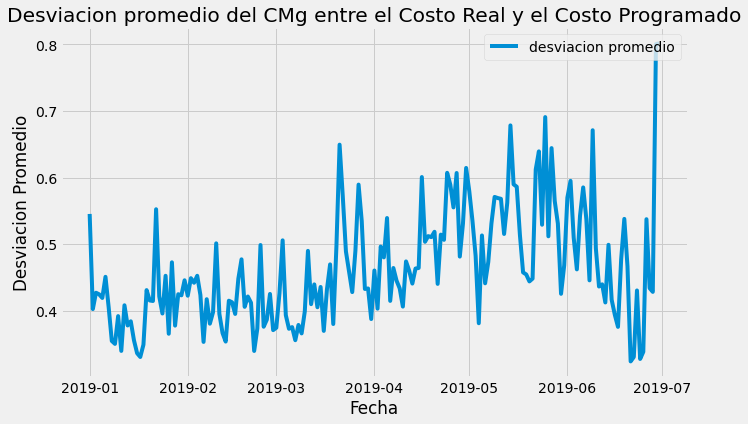

In [29]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df["desviacion_cat"], label='desviacion promedio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Desviacion Promedio')
ax.set_title('Desviacion promedio del CMg entre el Costo Real y el Costo Programado')
ax.grid(True)
ax.legend(loc='upper right')

In [30]:
"""
Se observa que el la desviación promedio del CMG tiene una media de 0.46, lo que nos da un indicio de que
tiene a disminuir con el paso del tiempo. Sin embargo, en el gráfico parece notarse una tendencia creciente hasta 
mediados del mes de mayo, luego se ve una caída pronunciada hasta fines de julio, lo que puede estar generando una
subestimación de la media.
Finalmente, se observa que hacia el final del período, la desviación media tiende a subir abruptamente.
"""

'\nSe observa que el la desviación promedio del CMG tiene una media de 0.46, lo que nos da un indicio de que\ntiene a disminuir con el paso del tiempo. Sin embargo, en el gráfico parece notarse una tendencia creciente hasta \nmediados del mes de mayo, luego se ve una caída pronunciada hasta fines de julio, lo que puede estar generando una\nsubestimación de la media.\nFinalmente, se observa que hacia el final del período, la desviación media tiende a subir abruptamente.\n'

# 3.Visualizacion de datos

In [31]:
df2 = costo_marginal
df2 = df2.rename(columns={'fecha_x':'fecha'})
df2['fecha'] = df2['fecha'].astype("datetime64")
df2 = df2.sort_values('fecha')
df2.head(100000)

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora_x,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,fecha_y,hora_y,costo,desviacion,desviacion_ptc,desviacion_cat
7201987,BA85L123SE103L123,BA02T002SE032T002,2019-01-01,19,53.05,36.91,BA S/E MANTOS BLANCOS 220KV,BA S/E MANTOS BLANCOS 220KV,2019-04-22,6,53.68,-0.63,-1.19,0
1396190,BA01T002SE020T002,BA02T002SE032T002,2019-01-01,16,44.75,31.13,BA S/E ITAHUE 154KV SECCION 1,BA S/E ITAHUE 154KV SECCION 1,2019-06-06,1,48.89,-4.14,-9.26,0
1396189,BA01T002SE020T002,BA02T002SE032T002,2019-01-01,16,44.75,31.13,BA S/E ITAHUE 154KV SECCION 1,BA S/E ITAHUE 154KV SECCION 1,2019-05-21,2,56.16,-11.41,-25.50,1
1396188,BA01T002SE020T002,BA02T002SE032T002,2019-01-01,16,44.75,31.13,BA S/E ITAHUE 154KV SECCION 1,BA S/E ITAHUE 154KV SECCION 1,2019-03-02,15,48.73,-3.98,-8.90,0
1396187,BA01T002SE020T002,BA02T002SE032T002,2019-01-01,16,44.75,31.13,BA S/E ITAHUE 154KV SECCION 1,BA S/E ITAHUE 154KV SECCION 1,2019-03-11,8,52.54,-7.79,-17.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981240,BA01T002SE004T002,BA02T002SE032T002,2019-01-03,14,52.34,36.36,BA S/E CIRUELOS 220KV BARRA 1,BA S/E CIRUELOS 220KV BARRA 1,2019-06-16,7,48.21,4.13,7.89,0
4981261,BA01T002SE004T002,BA02T002SE032T002,2019-01-03,14,52.34,36.36,BA S/E CIRUELOS 220KV BARRA 1,BA S/E CIRUELOS 220KV BARRA 1,2019-04-29,10,83.10,-30.76,-58.77,1
4981262,BA01T002SE004T002,BA02T002SE032T002,2019-01-03,14,52.34,36.36,BA S/E CIRUELOS 220KV BARRA 1,BA S/E CIRUELOS 220KV BARRA 1,2019-05-19,3,54.08,-1.74,-3.32,0
4981263,BA01T002SE004T002,BA02T002SE032T002,2019-01-03,14,52.34,36.36,BA S/E CIRUELOS 220KV BARRA 1,BA S/E CIRUELOS 220KV BARRA 1,2019-05-21,6,42.67,9.67,18.48,1


In [32]:
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    df2 = pd.DataFrame(costo_marginal)
    df2 = df2[df2['barra_mnemotecnico'] == codigo_barra]
    df2 = df2.groupby('fecha_x').sum()
    df2 = df2.rename(columns={'costo':'cmg_prog','costo_en_dolares':'cmg_real'})
    df2 = df2.loc[fecha_inicial:fecha_final]
    
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df2["cmg_real"], label='cmg_real')
    ax.plot(df2["cmg_prog"], label='cmg_prog')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Costo Marginal')
    ax.set_title('Costo Marginal Real y Programado por Fecha')
    ax.grid(True)
    ax.legend(loc='upper right')
    plt.xticks(rotation=90)
    for label in ax.get_xaxis().get_ticklabels()[::2]:
        label.set_visible(False)

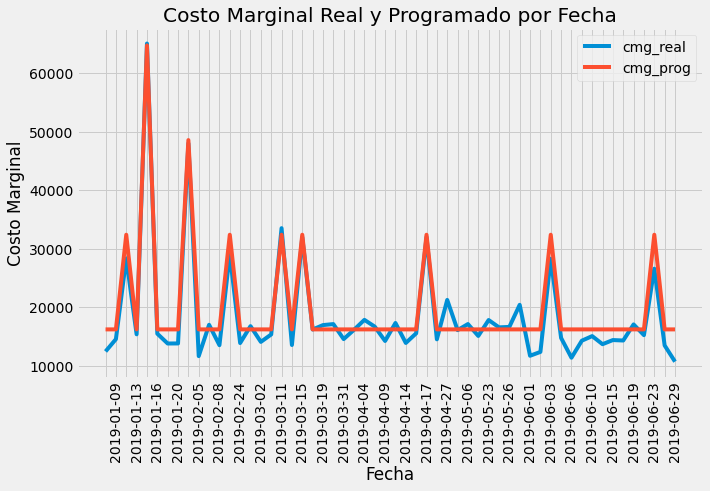

In [33]:
time_plot_costo_barra('BA02T005SE190T005','2019-01-01','2019-06-30')

In [133]:
"""
En el gráfico se puede visualizar que, en general, el Costo Marginal programado se ajusta bastante bien al
costo marginal real. De hecho, puede observarse una suerte de suavización de la serie de CMg real.
A priori, las fluctuaciones del CMg Real no parecen desviarse mucho del CMg Programado
"""

'\nEn el gráfico se puede visualizar que, en general, el Costo Marginal programado se ajusta bastante bien al\ncosto marginal real. De hecho, puede observarse una suerte de suavización de la serie de CMg real.\nA priori, las fluctuaciones del CMg Real no parecen desviarse mucho del CMg Programado\n'

In [143]:
dataframe = costo_marginal
print (dataframe[dataframe["costo_en_dolares"] == 0])

Empty DataFrame
Columns: [barra_mnemotecnico, barra_referencia_mnemotecnico, fecha_x, hora_x, costo_en_dolares, costo_en_pesos, nombre, nombre_barra, fecha_y, hora_y, costo, desviacion, desviacion_ptc, desviacion_cat]
Index: []


In [144]:
"""
En la celda anterior se observa que en ningún caso se presenta un costo marginal real igual a 0
Por lo tanto, no se elimina ninguna fila
"""

'\nEn la celda anterior se observa que en ningún caso se presenta un costo marginal real igual a 0\nPor lo tanto, no se elimina ninguna fila\n'

# 4.Base para los modelos

In [134]:
base_predic = pd.read_csv('base_para_prediccion.csv')
base_predic

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.00,56.20,55.63,0.57,1.02,2,1210767,13.21
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.00,56.20,55.38,0.82,1.48,2,113232,13.21
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.00,56.20,59.53,-3.33,-5.59,2,1089415,13.21
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.00,56.20,174.38,-118.18,-67.77,2,1096867,13.21
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.00,56.20,172.82,-116.62,-67.48,2,1071851,13.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00 UTC,20,NaN,NaN,NaN,NaN,0.78,44.10,41.36,2.74,6.62,3,9334786,30.14
112775,SE170T005,2019-06-30 00:00:00 UTC,21,NaN,NaN,NaN,NaN,0.93,44.10,42.22,1.88,4.45,3,9353773,30.14
112776,SE170T005,2019-06-30 00:00:00 UTC,22,NaN,NaN,NaN,NaN,0.97,44.10,42.20,1.90,4.50,3,9114529,30.14
112777,SE170T005,2019-06-30 00:00:00 UTC,23,NaN,NaN,NaN,NaN,0.75,44.10,41.47,2.63,6.34,3,8118728,30.14


In [35]:
base_predic.describe()

,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
count,112779.00,0.00,0.00,34184.00,41818.00,61863.00,112779.00,112779.00,112779.00,112779.00,112779.00,112779.00,112779.00
mean,12.50,NaN,NaN,38.12,3.76,40.58,61.17,62.22,-1.05,inf,2.33,63570560.36,128.72
std,6.92,NaN,NaN,69.84,12.90,101.08,25.41,25.31,24.71,NaN,1.30,394868323.14,167.95
min,1.00,NaN,NaN,0.00,0.00,0.00,0.00,-1.71,-562.47,-3403.97,1.00,-9821094524.00,2.99
25%,7.00,NaN,NaN,0.85,0.00,0.00,49.13,49.91,-3.79,-7.07,1.00,746480.00,18.42
50%,13.00,NaN,NaN,9.60,0.00,0.00,54.61,55.42,-0.31,-0.58,2.00,4507282.00,51.85
75%,19.00,NaN,NaN,40.00,1.57,15.96,63.50,64.70,1.67,2.92,3.00,13323449.50,184.69
max,25.00,NaN,NaN,472.00,86.05,570.60,240.36,610.60,175.02,inf,6.00,10042403907.00,597.78


In [36]:
base_predic.dtypes

nemotecnico_se               object
fecha                        object
hora                          int64
gen_eolica_total_mwh        float64
gen_geotermica_total_mwh    float64
gen_hidraulica_total_mwh    float64
gen_solar_total_mwh         float64
gen_termica_total_mwh       float64
cmg_real                    float64
cmg_prog                    float64
cmg_desv                    float64
cmg_desv_pct                float64
n_barras                      int64
demanda_mwh                   int64
cap_inst_mw                 float64
dtype: object

In [37]:
base_predic.shape

(112779, 15)

In [38]:
print(base_predic.isnull().sum())

nemotecnico_se                   0
fecha                            0
hora                             0
gen_eolica_total_mwh        112779
gen_geotermica_total_mwh    112779
gen_hidraulica_total_mwh     78595
gen_solar_total_mwh          70961
gen_termica_total_mwh        50916
cmg_real                         0
cmg_prog                         0
cmg_desv                         0
cmg_desv_pct                     0
n_barras                         0
demanda_mwh                      0
cap_inst_mw                      0
dtype: int64


In [39]:
"""
En primer lugar podemos ver las estadísticas descriptivas de las variables
En eso podemos visualizar que las variables gen_eolica_total_mwh, gen_geotermica_total_mwh, gen_hidraulica_total_mwh
y gen_solar_total_mwh presentan missing values. 
Tenemos dos variables de tipo Object, tres variables de tipo int64 y 10 variables float64.
"""

'\nEn primer lugar podemos ver las estadísticas descriptivas de las variables\nEn eso podemos visualizar que las variables gen_eolica_total_mwh, gen_geotermica_total_mwh, gen_hidraulica_total_mwh\ny gen_solar_total_mwh presentan missing values. \nTenemos dos variables de tipo Object, tres variables de tipo int64 y 10 variables float64.\n'

In [40]:
# base_predic.head()
base_predic[["año", "mes", "dia"]] = base_predic['fecha'].str.split('-', expand = True)
base_predic['dia'] = base_predic['dia'].str.split(' ').str[0]
year = base_predic['año'].to_list()
month = base_predic['mes'].to_list()
day = base_predic['dia'].to_list()
base_predic['año'] = list(map(int, year))
base_predic['mes'] = list(map(int, month))
base_predic['dia'] = list(map(int, day))
base_predic

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,año,mes,dia
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.00,56.20,55.63,0.57,1.02,2,1210767,13.21,2019,1,4
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.00,56.20,55.38,0.82,1.48,2,113232,13.21,2019,1,4
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.00,56.20,59.53,-3.33,-5.59,2,1089415,13.21,2019,1,4
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.00,56.20,174.38,-118.18,-67.77,2,1096867,13.21,2019,1,4
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.00,56.20,172.82,-116.62,-67.48,2,1071851,13.21,2019,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00 UTC,20,NaN,NaN,NaN,NaN,0.78,44.10,41.36,2.74,6.62,3,9334786,30.14,2019,6,30
112775,SE170T005,2019-06-30 00:00:00 UTC,21,NaN,NaN,NaN,NaN,0.93,44.10,42.22,1.88,4.45,3,9353773,30.14,2019,6,30
112776,SE170T005,2019-06-30 00:00:00 UTC,22,NaN,NaN,NaN,NaN,0.97,44.10,42.20,1.90,4.50,3,9114529,30.14,2019,6,30
112777,SE170T005,2019-06-30 00:00:00 UTC,23,NaN,NaN,NaN,NaN,0.75,44.10,41.47,2.63,6.34,3,8118728,30.14,2019,6,30


In [41]:
import datetime

daysem = []
for i in range(0,112779):
    diasemanal = datetime.date(base_predic['año'][i], base_predic['mes'][i], base_predic['dia'][i]).strftime('%w')
    daysem.append(diasemanal)

In [42]:
base_predic['diasemanal'] = daysem
base_predic

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,año,mes,dia,diasemanal
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.00,56.20,55.63,0.57,1.02,2,1210767,13.21,2019,1,4,5
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.00,56.20,55.38,0.82,1.48,2,113232,13.21,2019,1,4,5
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.00,56.20,59.53,-3.33,-5.59,2,1089415,13.21,2019,1,4,5
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.00,56.20,174.38,-118.18,-67.77,2,1096867,13.21,2019,1,4,5
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.00,56.20,172.82,-116.62,-67.48,2,1071851,13.21,2019,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00 UTC,20,NaN,NaN,NaN,NaN,0.78,44.10,41.36,2.74,6.62,3,9334786,30.14,2019,6,30,0
112775,SE170T005,2019-06-30 00:00:00 UTC,21,NaN,NaN,NaN,NaN,0.93,44.10,42.22,1.88,4.45,3,9353773,30.14,2019,6,30,0
112776,SE170T005,2019-06-30 00:00:00 UTC,22,NaN,NaN,NaN,NaN,0.97,44.10,42.20,1.90,4.50,3,9114529,30.14,2019,6,30,0
112777,SE170T005,2019-06-30 00:00:00 UTC,23,NaN,NaN,NaN,NaN,0.75,44.10,41.47,2.63,6.34,3,8118728,30.14,2019,6,30,0


In [43]:
week = []
for i in range(0,112779):
    weekyear = datetime.date(base_predic['año'][i], base_predic['mes'][i], base_predic['dia'][i]).strftime('%W')
    week.append(weekyear)

In [44]:
base_predic['semana'] = week
base_predic

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,año,mes,dia,diasemanal,semana
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.00,56.20,55.63,0.57,1.02,2,1210767,13.21,2019,1,4,5,00
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.00,56.20,55.38,0.82,1.48,2,113232,13.21,2019,1,4,5,00
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.00,56.20,59.53,-3.33,-5.59,2,1089415,13.21,2019,1,4,5,00
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.00,56.20,174.38,-118.18,-67.77,2,1096867,13.21,2019,1,4,5,00
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.00,56.20,172.82,-116.62,-67.48,2,1071851,13.21,2019,1,4,5,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00 UTC,20,NaN,NaN,NaN,NaN,0.78,44.10,41.36,2.74,6.62,3,9334786,30.14,2019,6,30,0,25
112775,SE170T005,2019-06-30 00:00:00 UTC,21,NaN,NaN,NaN,NaN,0.93,44.10,42.22,1.88,4.45,3,9353773,30.14,2019,6,30,0,25
112776,SE170T005,2019-06-30 00:00:00 UTC,22,NaN,NaN,NaN,NaN,0.97,44.10,42.20,1.90,4.50,3,9114529,30.14,2019,6,30,0,25
112777,SE170T005,2019-06-30 00:00:00 UTC,23,NaN,NaN,NaN,NaN,0.75,44.10,41.47,2.63,6.34,3,8118728,30.14,2019,6,30,0,25


## Para graficar series por separado

In [86]:
def graf_timeseries(df, año, mes, dia, codigo, variable, title="", xlabel='Hora', ylabel='Valores'):
    
    df1 = df
    df1 = df1[df1['nemotecnico_se'] == codigo]
    df1 = df1[df1['año'] == año]
    df1 = df1[df1['dia'] == dia]
    df1 = df1[df1['mes'] == mes]
    df1 = df1.groupby('hora', as_index=False).sum()

    hora = df1['hora'].to_list()
    hora = list(map(int, hora))
    
    variab = df1[f'{variable}'].to_list()
    variab = list(map(int, variab))
    
    plt.figure(figsize=(16,5))
    plt.plot(hora, variab, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()    

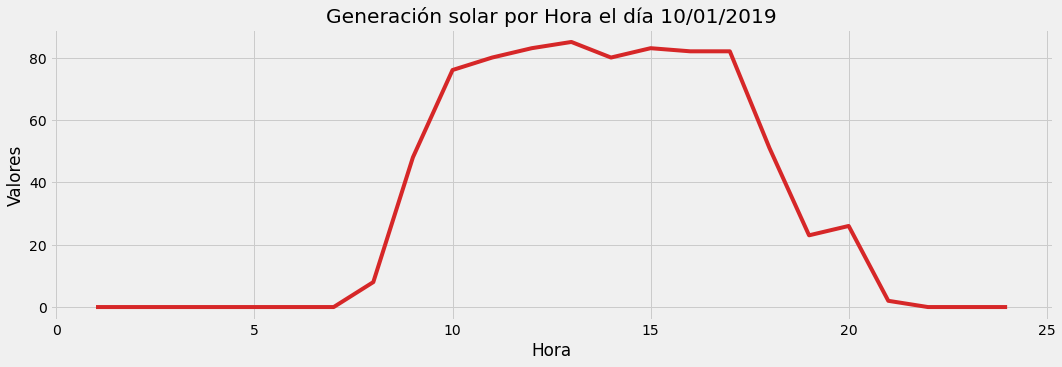

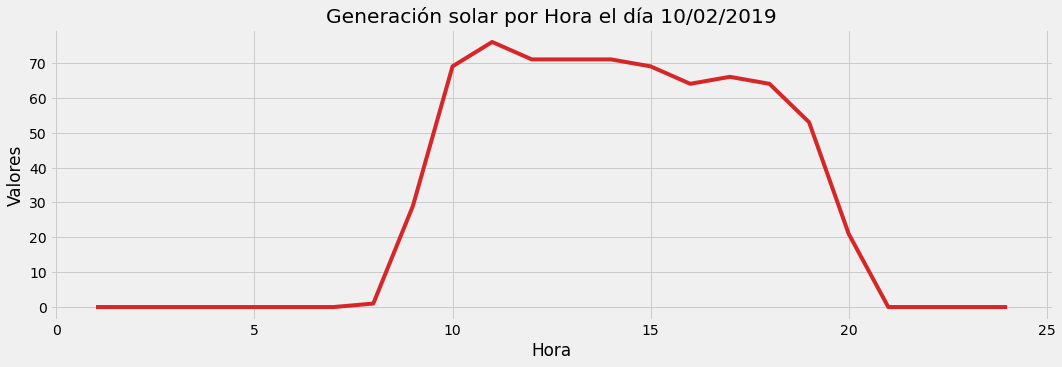

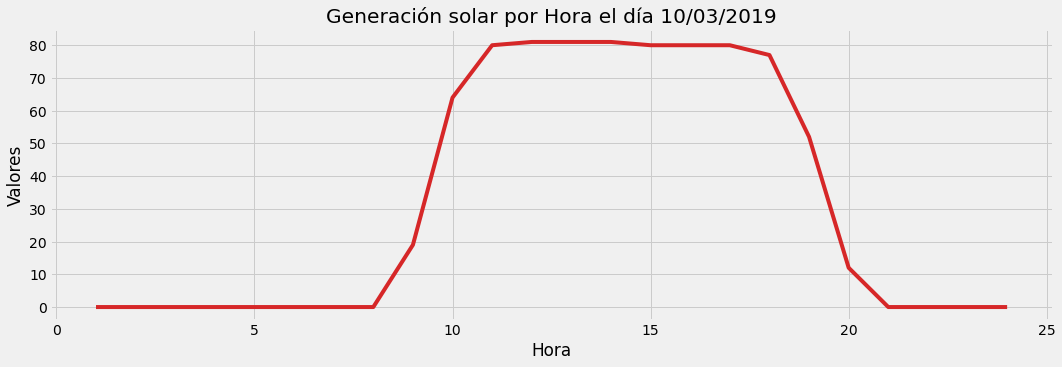

In [87]:
graf_timeseries(base_predic,2019,1,10,'SE005T002','gen_solar_total_mwh','Generación solar por Hora el día 10/01/2019')
graf_timeseries(base_predic,2019,2,10,'SE005T002','gen_solar_total_mwh','Generación solar por Hora el día 10/02/2019')
graf_timeseries(base_predic,2019,3,10,'SE005T002','gen_solar_total_mwh','Generación solar por Hora el día 10/03/2019')

## Para multiples series de tiempo en el mismo gráfico

In [116]:
import seaborn as sns
def graf_timeseries1(df, año, mes, dia, codigo, variable, title="", xlabel='Hora', ylabel='Valores', label=''):
    
    df1 = df
    df1 = df1[df1['nemotecnico_se'] == codigo]
    df1 = df1[df1['año'] == año]
    df1 = df1[df1['dia'] == dia]
    df1 = df1[df1['mes'] == mes]
    df1 = df1.groupby('hora', as_index=False).sum()

    hora = df1['hora'].to_list()
    hora = list(map(int, hora))
    
    variab = df1[f'{variable}'].to_list()
    variab = list(map(int, variab))
    
    df3 = pd.DataFrame({'hora': hora,'variab': variab})
    
    from matplotlib import rcParams
    rcParams['figure.figsize'] = 15,8
    sns.lineplot(x = "hora", y = "variab", data = df3, legend = 'full', label=label)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

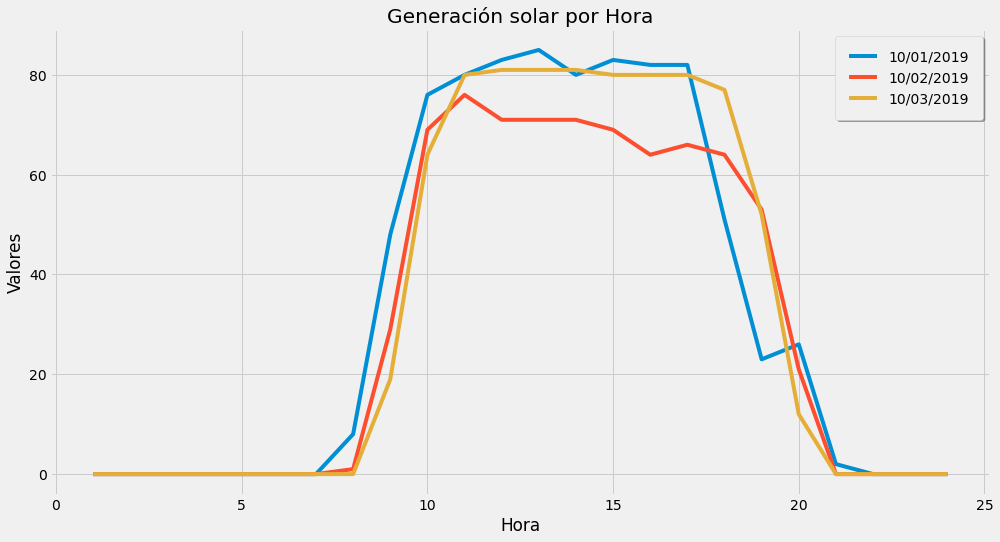

In [118]:
graf_timeseries1(base_predic,2019,1,10,'SE005T002','gen_solar_total_mwh','Generación solar por Hora', label='10/01/2019')
graf_timeseries1(base_predic,2019,2,10,'SE005T002','gen_solar_total_mwh','Generación solar por Hora', label='10/02/2019')
graf_timeseries1(base_predic,2019,3,10,'SE005T002','gen_solar_total_mwh','Generación solar por Hora', label='10/03/2019')

# Generación Solar por Hora

## Subestación SE005T002

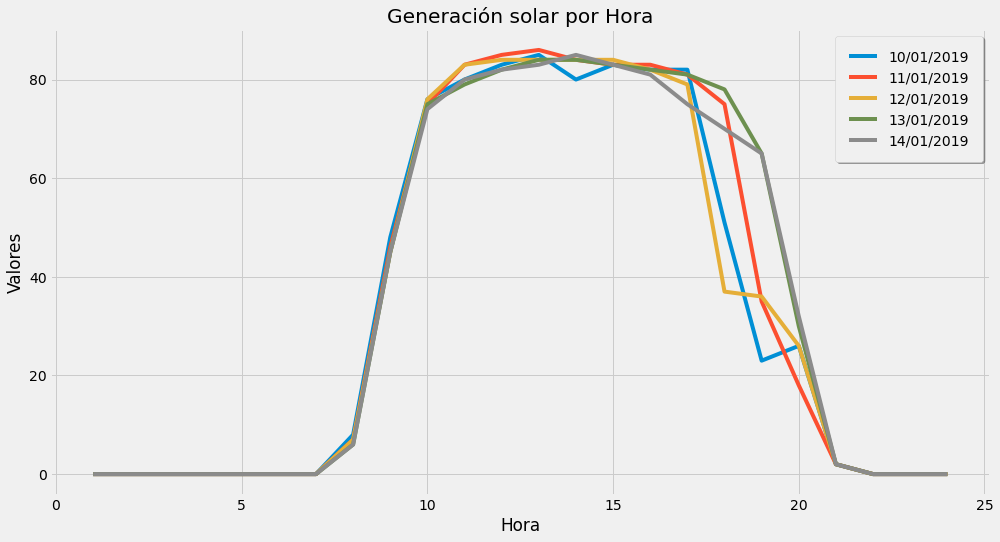

In [119]:
graf_timeseries1(base_predic,2019,1,10,'SE005T002','gen_solar_total_mwh','Generación solar por Hora', label='10/01/2019')
graf_timeseries1(base_predic,2019,1,11,'SE005T002','gen_solar_total_mwh','Generación solar por Hora', label='11/01/2019')
graf_timeseries1(base_predic,2019,1,12,'SE005T002','gen_solar_total_mwh','Generación solar por Hora', label='12/01/2019')
graf_timeseries1(base_predic,2019,1,13,'SE005T002','gen_solar_total_mwh','Generación solar por Hora', label='13/01/2019')
graf_timeseries1(base_predic,2019,1,14,'SE005T002','gen_solar_total_mwh','Generación solar por Hora', label='14/01/2019')

In [145]:
"""
En el caso de la energía solar de la subestación SE005T002 se observa un comportamiento similar a lo largo de los días
Se puede visualizar un leve aumento en la energía solar generada a partir de las 16/17hs aproximadamente 
a medida que avanzan los días
"""

'\nEn el caso de la energía solar de la subestación SE005T002 se observa un comportamiento similar a lo largo de los días\nSe puede visualizar un leve aumento en la energía solar generada a partir de las 16/17hs aproximadamente \na medida que avanzan los días\n'

## Subestación SE127T005

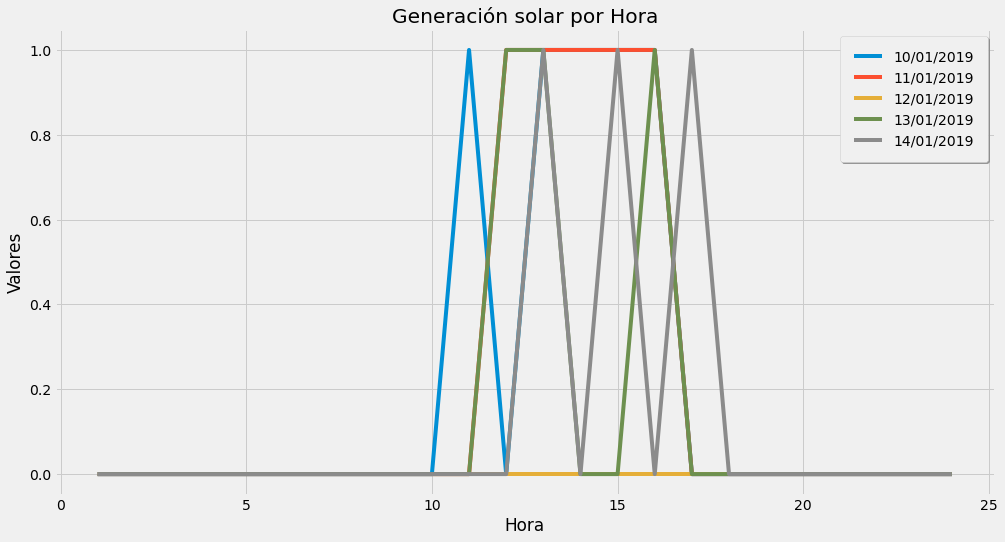

In [120]:
graf_timeseries1(base_predic,2019,1,10,'SE127T005','gen_solar_total_mwh','Generación solar por Hora', label='10/01/2019')
graf_timeseries1(base_predic,2019,1,11,'SE127T005','gen_solar_total_mwh','Generación solar por Hora', label='11/01/2019')
graf_timeseries1(base_predic,2019,1,12,'SE127T005','gen_solar_total_mwh','Generación solar por Hora', label='12/01/2019')
graf_timeseries1(base_predic,2019,1,13,'SE127T005','gen_solar_total_mwh','Generación solar por Hora', label='13/01/2019')
graf_timeseries1(base_predic,2019,1,14,'SE127T005','gen_solar_total_mwh','Generación solar por Hora', label='14/01/2019')

In [146]:
"""
A diferencia de la subestación SE005T002, en la subestación SE127T005 se puede ver que no hay un comportamiento
similar en la generación de energía solar a través de los días. Por lo que deberíamos observar cual es la situación
que podría estar generando este comportamiento (Mal tiempo quizas?)
"""

'\nA diferencia de la subestación SE005T002, en la subestación SE127T005 se puede ver que no hay un comportamiento\nsimilar en la generación de energía solar a través de los días. Por lo que deberíamos observar cual es la situación\nque podría estar generando este comportamiento (Mal tiempo quizas?)\n'

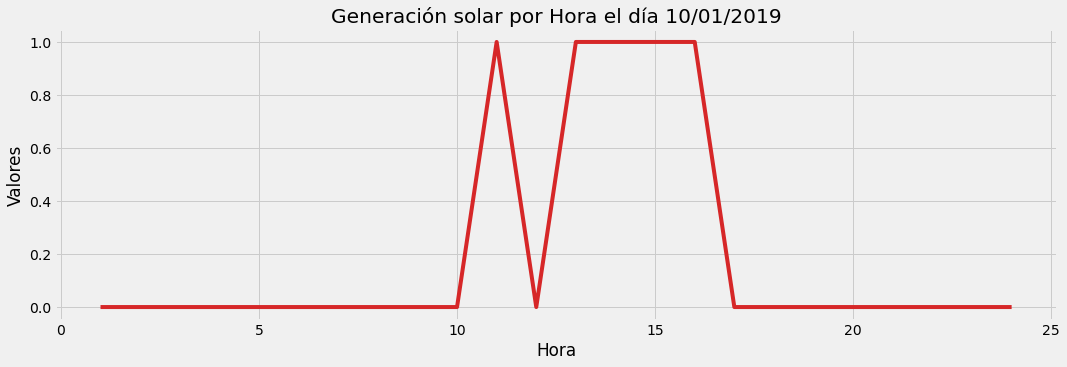

In [121]:
graf_timeseries(base_predic,2019,1,10,'SE127T005','gen_solar_total_mwh','Generación solar por Hora el día 10/01/2019')

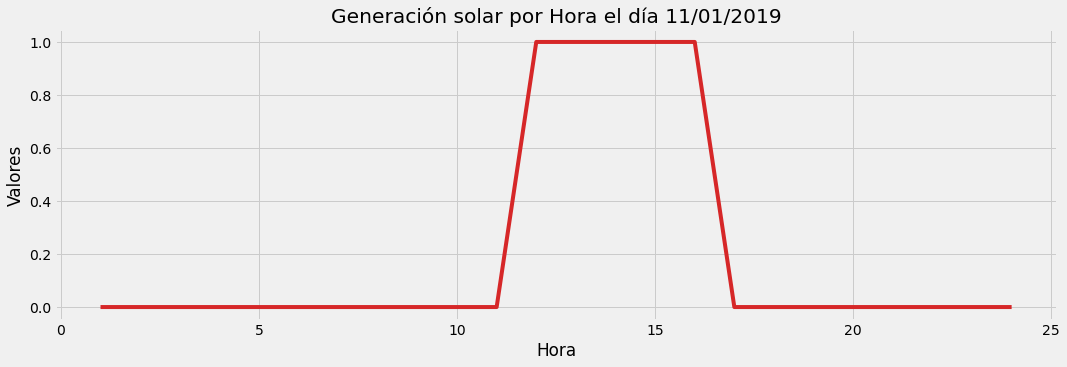

In [122]:
graf_timeseries(base_predic,2019,1,11,'SE127T005','gen_solar_total_mwh','Generación solar por Hora el día 11/01/2019')

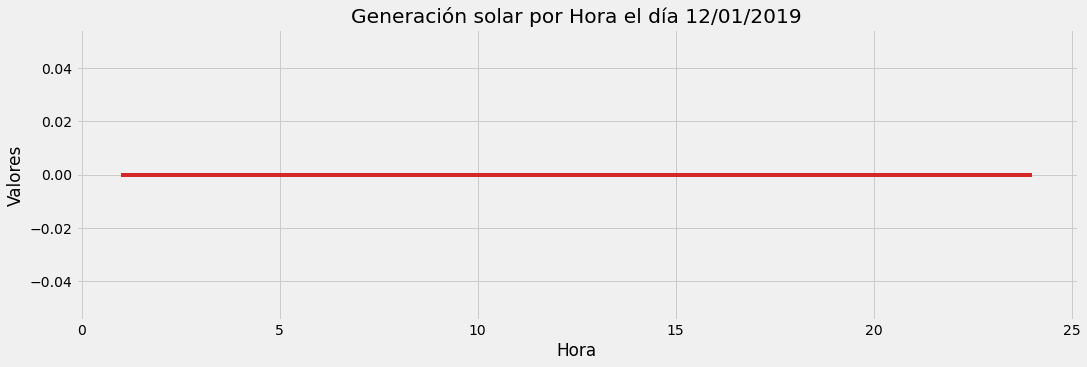

In [123]:
graf_timeseries(base_predic,2019,1,12,'SE127T005','gen_solar_total_mwh','Generación solar por Hora el día 12/01/2019')

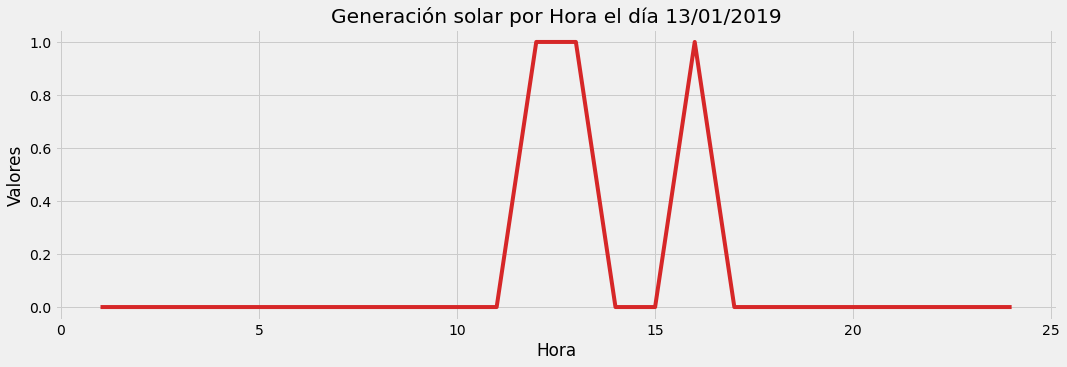

In [124]:
graf_timeseries(base_predic,2019,1,13,'SE127T005','gen_solar_total_mwh','Generación solar por Hora el día 13/01/2019')

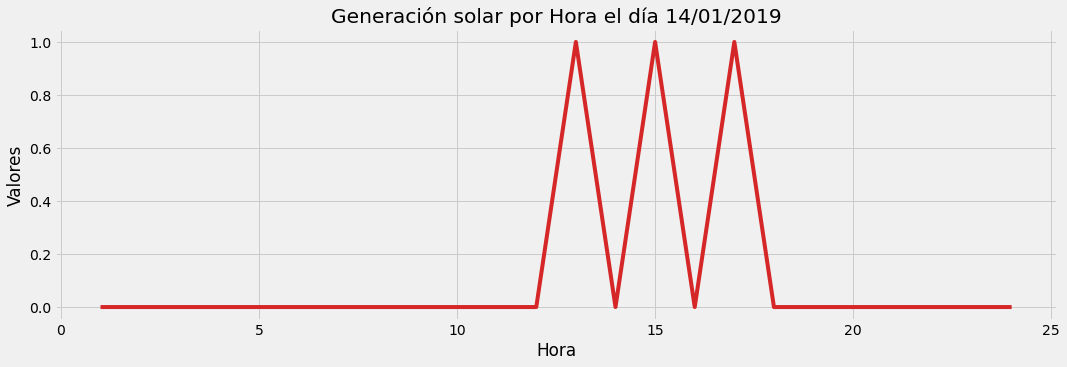

In [125]:
graf_timeseries(base_predic,2019,1,14,'SE127T005','gen_solar_total_mwh','Generación solar por Hora el día 14/01/2019')

# Generación Térmica por Hora

## Subestación SE020G213 

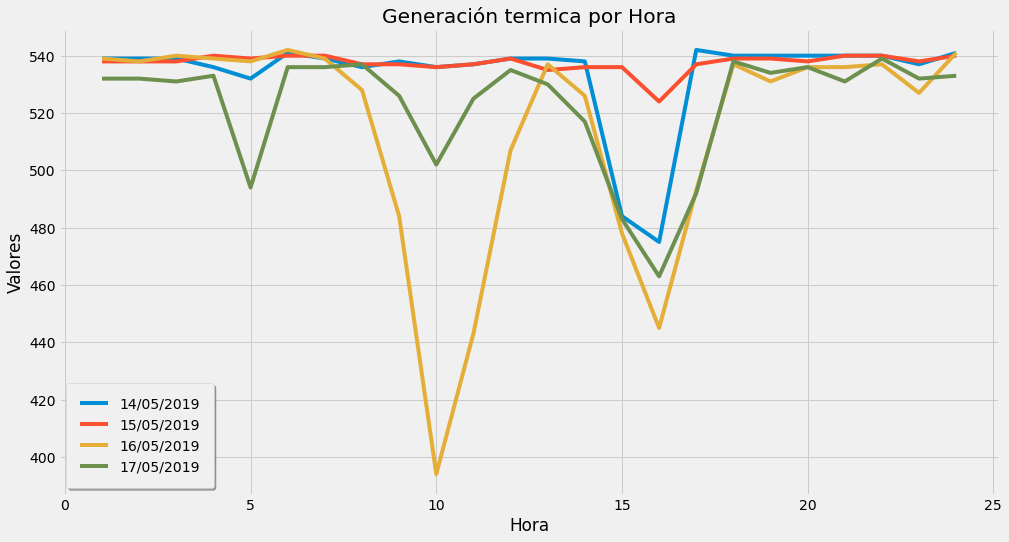

In [128]:
graf_timeseries1(base_predic,2019,5,14,'SE020G213','gen_termica_total_mwh','Generación termica por Hora', label='14/05/2019')
graf_timeseries1(base_predic,2019,5,15,'SE020G213','gen_termica_total_mwh','Generación termica por Hora', label='15/05/2019')
graf_timeseries1(base_predic,2019,5,16,'SE020G213','gen_termica_total_mwh','Generación termica por Hora', label='16/05/2019')
graf_timeseries1(base_predic,2019,5,17,'SE020G213','gen_termica_total_mwh','Generación termica por Hora', label='17/05/2019')

In [147]:
"""
En el caso de la subestación SE020G213, observando la generación de energía térmica, se puede ver que el comportamiendo
varía con el paso de los días. La tendencia fluctua de diferentes maneras de acuerdo al día en que se observa.
Lo que se puede observar fácilmente es que, en mayor o menor medida, en todos los días se puede ver un aumento en la energía
generada alrededor de las 16hs.
"""

'\nEn el caso de la subestación SE020G213, observando la generación de energía térmica, se puede ver que el comportamiendo\nvaría con el paso de los días. La tendencia fluctua de diferentes maneras de acuerdo al día en que se observa.\nLo que se puede observar fácilmente es que, en mayor o menor medida, en todos los días se puede ver un aumento en la energía\ngenerada alrededor de las 16hs.\n'

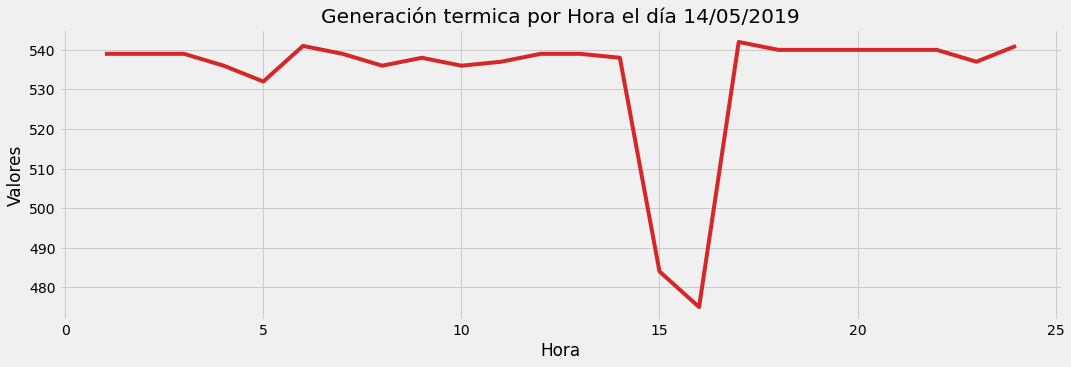

In [129]:
graf_timeseries(base_predic,2019,5,14,'SE020G213','gen_termica_total_mwh','Generación termica por Hora el día 14/05/2019')

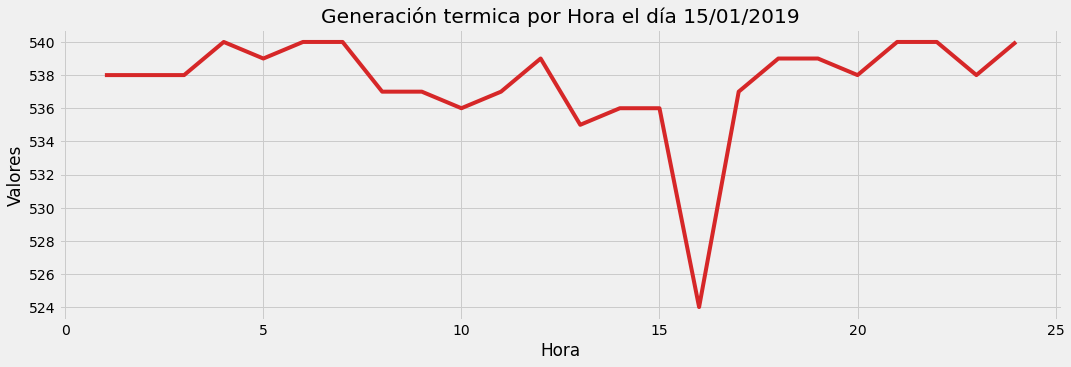

In [130]:
graf_timeseries(base_predic,2019,5,15,'SE020G213','gen_termica_total_mwh','Generación termica por Hora el día 15/01/2019')

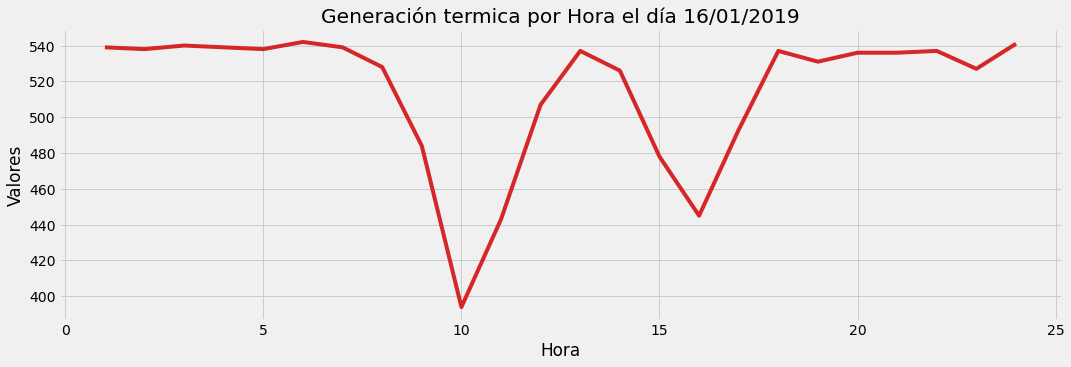

In [131]:
graf_timeseries(base_predic,2019,5,16,'SE020G213','gen_termica_total_mwh','Generación termica por Hora el día 16/01/2019')

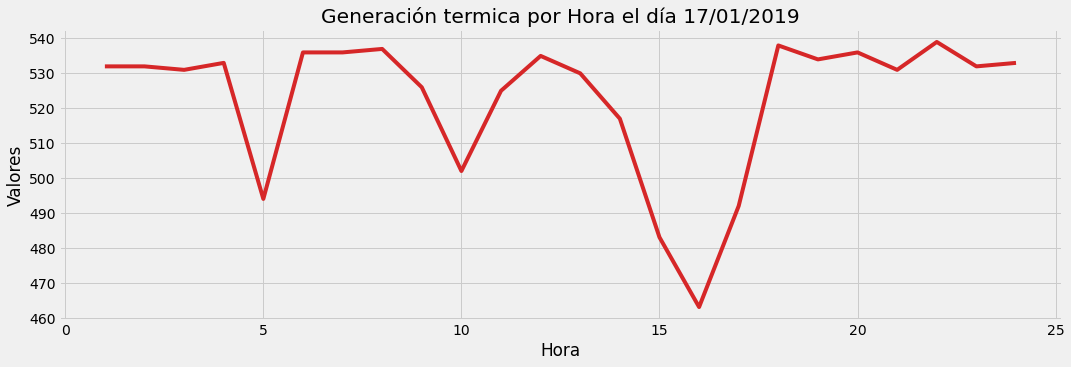

In [132]:
graf_timeseries(base_predic,2019,5,17,'SE020G213','gen_termica_total_mwh','Generación termica por Hora el día 17/01/2019')